In [1]:
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

# Convert Video to Frames

Note, the video has been converted to a .mp4 file locally.

In [2]:
def vid_to_frame(path_video, path_frames):
    vidcap = cv2.VideoCapture(path_video)
    os.chdir(path_frames)

    def getFrames(sec):
        vidcap.set(cv2.CAP_PROP_POS_MSEC, sec * 1000)
        frame, image = vidcap.read()
        if frame:
            cv2.imwrite(str(count) + "_image.jpg", image)
            
        return frame
    
    sec = 0
    framerate = 1
    count = 1
    condition = getFrames(sec)
    while condition:
        count += 1
        sec += framerate
        sec = round(sec,2)
        condition = getFrames(sec)

# SET PATH!

In [3]:
path_video = ""
path_frames = ""

In [4]:
frames_have_been_extracted = False

if frames_have_been_extracted == False:
    vid_to_frame(path_video, path_frames)

# Load Image

Sort Image Directory:

In [5]:
directory_frames = os.listdir(path_frames)
directory_frames.sort(key=lambda x: int(x.strip('_image.jpg')))
directory_frames[:10]

['1_image.jpg',
 '2_image.jpg',
 '3_image.jpg',
 '4_image.jpg',
 '5_image.jpg',
 '6_image.jpg',
 '7_image.jpg',
 '8_image.jpg',
 '9_image.jpg',
 '10_image.jpg']

In [11]:
img = [cv2.imread(str(path_frames) + str(file) ,0) for file in directory_frames]

In [12]:
print(f"The 'img' list contains {len(img)} images. The 'Frames' directory holds {len(directory_frames)} images.") 
print(f"They hold the same number of images? {len(img) == len(directory_frames)}")

The 'img' list contains 2353 images. The 'Frames' directory holds 2353 images.
They hold the same number of images? True


# Display Image

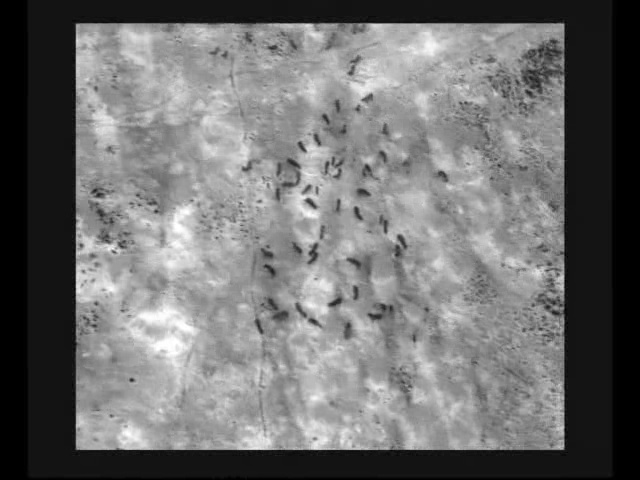

In [14]:
index = 570
Image.fromarray(img[index])

# Image Threshold

In [15]:
def threshold_image(img, threshold):
    segmented_img_list = []
    
    if len(img) == 0:
        return "The threshold_image function did not recieve any input."
    
    elif len(img) == 1:
        ret, thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_TRUNC)
        segmented_img_list.append(thresh)
        
    else:
        for image in img:
            ret, thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_TRUNC)
            segmented_img_list.append(thresh)
        
    return segmented_img_list

In [16]:
list_threshold_images = threshold_image(img, 130)

Analyse the threshold value:

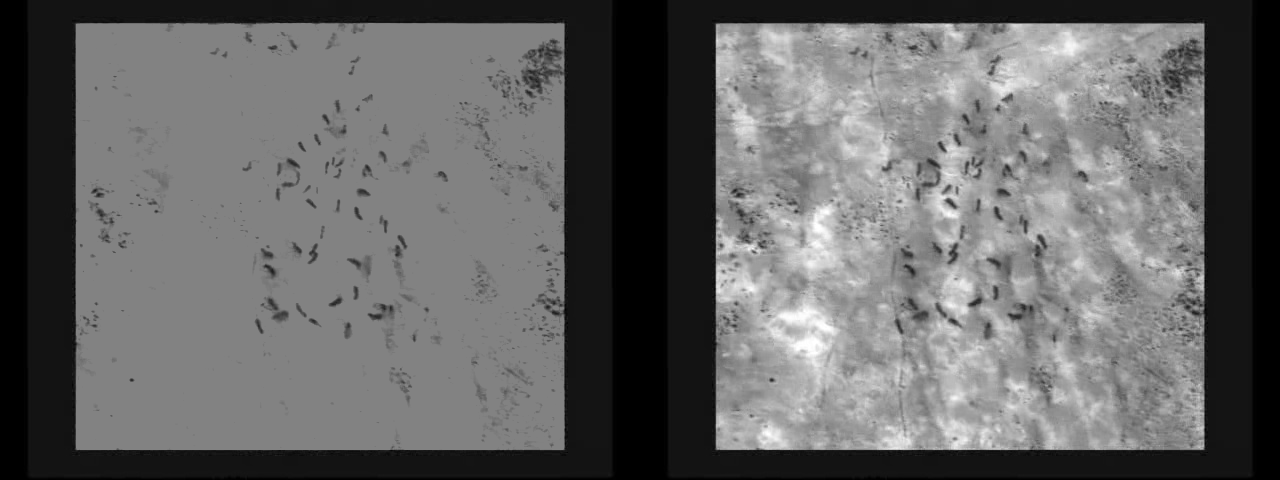

In [18]:
threshold_image = Image.fromarray(list_threshold_images[570])
regular_image = Image.fromarray(img[570])

Image.fromarray(np.hstack((np.array(threshold_image),np.array(regular_image))))

# Downscale Images

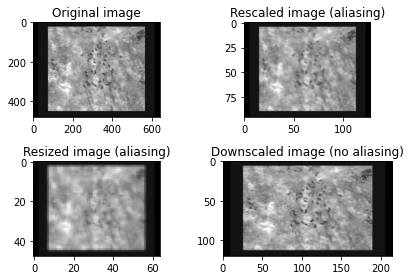

In [21]:
image = img[570]

image_rescaled = rescale(image, 0.20, anti_aliasing= True)
image_resized = resize(image, (image.shape[0] // 10, image.shape[1] // 10),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 640)
ax[0].set_ylim(480, 0)
plt.tight_layout()
plt.show()

In [22]:
list_downscaled_images = [rescale(image, 0.20, anti_aliasing = True) for image in img]